### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# Assignment 3: Classification with Logistic Regression  [ __ /100  marks]


In this assignment we will use the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database.

We will use logistic regression to predict whether subjects have diabetes or not.

## Global Toolbox

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
seed=0

## Question 1.1 [ _ /3 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame.

In [18]:
# ****** your code here ******
df = pd.read_csv("diabetes.csv")
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /6 marks]

(1) How many classes are there? How many features are available to predict the outcome?

**Your answer**: There are two classes in this data set as there are only two possible outcomes, either 0 or 1. There are eight features available to predict the outcome: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function, and age.

(2) Is the dataset class-balanced?

In [19]:
# ****** your code here ******
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Your answer**:
No, this dataset is not class-balanced as the number of observations for each of the possible outcomes is not the same. There are 500 counts of 0 and only 268 counts of a 1 outcome.

(3) For this classification problem, what is the baseline accuracy and how would you interpret it? Round into 3 decimal place.

In [20]:
A = df.Outcome[df["Outcome"] == 0].count()
B = df.Outcome[df["Outcome"] == 1].count()

baseline_accuracy = A/(A+B)
print("Baseline Accuracy is: " + str((baseline_accuracy*100).round(3)) + "%")

Baseline Accuracy is: 65.104%


**Your answer:**
The baseline accuracy, rounded to 3 decimal places, is 65.104%. This is the accuracy resulting from a simple prediction and we can compare results from other models to it. On it's own, 65.104% may not mean much, but it serves as a point of reference for the other models we will make.

## Question 1.3 [ _ /3 marks]

Use `train_test_split` with `random_state=0` to split the data into training and test sets. Leave `20%` for testing.

In [21]:
# Store all the features into variable "X"
X = df.drop("Outcome", axis="columns").values

# Store the output class values into variable "y"
y = df.Outcome.values

# Split your X and y data using train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

## Question 2.1 [ _ /3 marks]

We will use sklearn's `LogisticRegression` to solve the classification problem. Before we move on, answer the following questions by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


(1) Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**Your answer**:
Yes, `LogisticRegression` uses a L2 penalty term by default.

    
(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients (parameters), relative to not applying a penalty during learning?

**Your answer**:
If we apply a L1 penalty, which takes the sum of the absolute values of the coefficients, we should expect some coefficients to be zero.

If we apply a L2 penalty, which uses the sum of the squared coffieicnts, we should expect smaller, but non-zero, coefficients.
    
(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**:
While using the default setting of `LogisticRegression`, we do not need to include a column of 1s because the default value of `fit_intercept` is true, which will add an intercept to the decision function automatically.

## Question 2.2 [ _ /10 marks]

Create a `LogisticRegression` model with `penalty=none`. Let's fisrt train and test this classifier using only "Insulin" as the input feature. Make a scatter plot of the points. Plot your prediction on the same graph.

Text(0, 0.5, 'Outcomes')

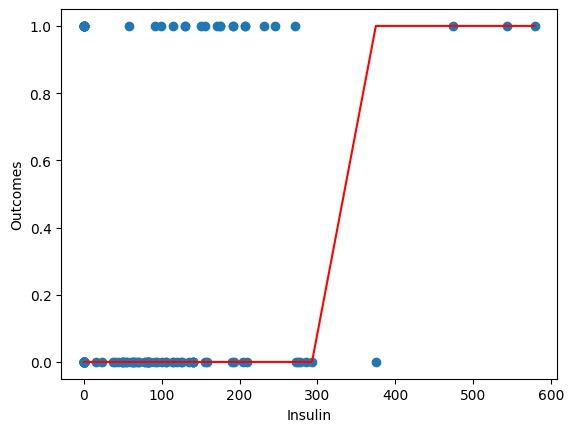

In [22]:
# Create a LogisticRegression model without regularization
diabeteslr = LogisticRegression(penalty=None)

# Obtain training data and test data
X = df["Insulin"].values.reshape(-1, 1)
y = df["Outcome"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit to your training data using Logistic Regression
diabeteslr.fit(Xtrain, ytrain)
ytest_prob_2_2 = diabeteslr.predict_proba(Xtest)

# Create a scatter plot of the test data.
plt.scatter(Xtest, ytest)

# Also plot your prediction using sns.lineplot
# lineplot needs 1d vector x
ypred = diabeteslr.predict(Xtest)
sns.lineplot(x=Xtest.flatten(), y=ypred, color="red")
plt.xlabel("Insulin")
plt.ylabel("Outcomes")


## Question 2.3 [ _ /10 marks]
Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.

In [23]:
# You can either write a function or not
def compute_performance(yhat, ytest):
  tp = sum(np.logical_and((yhat == 1), (ytest == 1)))
  tn = sum(np.logical_and((yhat == 0), (ytest == 0)))
  fp = sum(np.logical_and((yhat == 1), (ytest == 0)))
  fn = sum(np.logical_and((yhat == 0), (ytest == 1)))

  # Accuracy
  accuracy = (tp + tn) / (tp + tn + fp + fn)

  # Precision
  precision = tp / (tp + fp)

  # Recall
  recall = tp / (tp + fn)

  # Sensitivity
  sensitivity = recall

  # Specificity
  specificity = tn / (fp + tn)

  print("Accuracy:",round(accuracy,3),"\nPrecision:",round(precision,3),"\nRecall:",round(recall,3),
            "\nSensitivity:",round(sensitivity,3),"\nSpecificity:",round(specificity,3))

yhat = diabeteslr.predict(Xtest)
compute_performance(yhat, ytest)

Accuracy: 0.708 
Precision: 0.75 
Recall: 0.064 
Sensitivity: 0.064 
Specificity: 0.991


## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.

In [24]:
# Create a LogisticRegression model without regularization
diabeteslrNoPenalty = LogisticRegression(penalty=None, max_iter=10000)

# Fit to your training data using Logistic Regression
X = df.drop(columns=['Outcome'])
y = df['Outcome']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
diabeteslrNoPenalty.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs
yhat = diabeteslrNoPenalty.predict(Xtest)
ytest_prob_3_1 = diabeteslrNoPenalty.predict_proba(Xtest)

# Evaluate the performance
compute_performance(yhat, ytest)

Accuracy: 0.779 
Precision: 0.69 
Recall: 0.58 
Sensitivity: 0.58 
Specificity: 0.875


Does using more features help to improve the classification?

**Your answer** :
Yes, in this case using more features helps improve the classification as the accuracy, precision, and sensitivity numbers are higher. That means it's overall more correct, there are less false positives better, and a higher ratio of true positives.

## Question 3.2 [ _ /10 marks]
Let's adjust the decision threshold from 0.5 (default) to 0.4 and 0.6, and then evlaute the performance.

In [26]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions
threshold = 0.4
ytest_prob = diabeteslrNoPenalty.predict_proba(Xtest)

# Evaluate the performance
yhat = diabeteslrNoPenalty.classes_[(ytest_prob[:,1] > threshold).astype(int)]
compute_performance(yhat, ytest)

Accuracy: 0.779 
Precision: 0.648 
Recall: 0.7 
Sensitivity: 0.7 
Specificity: 0.817


In [28]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions
threshold = 0.6
ytest_prob = diabeteslrNoPenalty.predict_proba(Xtest)

# Evaluate the performance
yhat = diabeteslrNoPenalty.classes_[(ytest_prob[:,1] > threshold).astype(int)]
compute_performance(yhat, ytest)

Accuracy: 0.786 
Precision: 0.73 
Recall: 0.54 
Sensitivity: 0.54 
Specificity: 0.904


What do you think is a better threshold?

**Your answer**:

## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.

In [ ]:
# Create a LogisticRegression model with l2 regularization
diabeteslrL2 = LogisticRegression(penalty="l2", C=0.01, max_iter=10000)

# Fit to your training data using Logistic Regression
X = df.drop(columns=['Outcome'])
y = df['Outcome']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
diabeteslrL2.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs
yhat = diabeteslrL2.predict(Xtest)
ytest_prob_3_3 = diabeteslrL2.predict_proba(Xtest)

# Evaluate the performance
compute_performance(yhat, ytest, diabeteslrL2.classes_)

Accuracy: 0.74 
Precision: 0.63 
Recall: 0.558 
Sensitivity: 0.558 
Specificity: 0.833


Does regularization help to improve the classification?

**Your answer** :

## Question 4 [ _ /15 marks]

Plot ROC Curves for the classifiers you used in questions 2.2, 3.1, and 3.3. Use AUC to determine which classifier is the best.

The AUC of the ROC curve is
Q2.2: 0.491 
Q3.1: 0.463 
Q3.3: 0.814


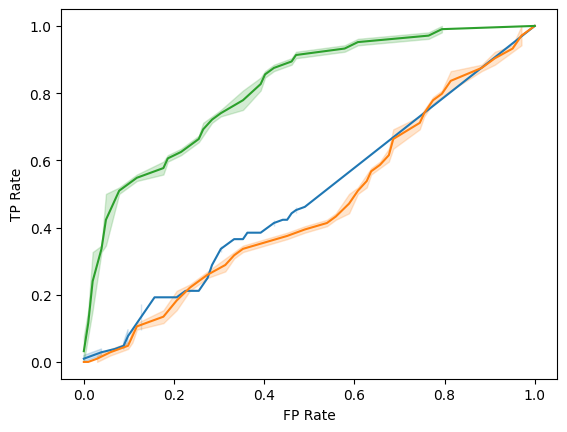

In [ ]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers
fpr, tpr, _ = roc_curve(ytest, ytest_prob_2_2[:,1])
fprNoPenalty, tprNoPenalty, _ = roc_curve(ytest, ytest_prob_3_1[:,1])
fprL2, tprL2, _ = roc_curve(ytest, ytest_prob_3_3[:,1])

# Plot all of the ROC curves
ax = sns.lineplot(x=fpr,y=tpr)
ax = sns.lineplot(x=fprNoPenalty,y=tprNoPenalty)
ax = sns.lineplot(x=fprL2,y=tprL2)
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")

# Determine AUC for each of the ROC curves
auc2_2 = auc(fpr, tpr).round(3)
auc3_1 = auc(fprNoPenalty, tprNoPenalty).round(3)
auc3_3 = auc(fprL2, tprL2).round(3)
print("The AUC of the ROC curve is\nQ2.2:", auc2_2, "\nQ3.1:", auc3_1, "\nQ3.3:", auc3_3)

Which one is the best classifier?

**Your answer**:

## Question 5 [ _ /10 marks]

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. Use the same dataset to train a multiclass **Logistic Regression** using the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  with `l2` regularization. So, this time you will have 10 classes, *i.e.*, 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. For training use `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For some `sklearn` functions you can set argument `n_jobs=N` to run them in parallel and speed up computations. A good value for N can be the number of physical CPU cores that your machine possesses (`N=-1` would use all cores). Check the documentations of the functions to take advantage from this where possible.

First load the data and plot a histogram to comment on class distribution qualitatively. For splitting the data into train and test sets, use `test_size=0.5` and `random_state=seed`. What is the balanced accuracy score of your model?

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import balanced_accuracy_score

# Fetch dataset and values
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=seed)

# Plot histogram
plt.hist(ytrain)

# Split data and fit model
sgd_clf = SGDClassifier(max_iter=2000, tol=1e-3, random_state=seed, n_jobs=8)
sgd_clf.fit(Xtrain, ytrain)

# Calculate balanced accuracy store
ypred = sgd_clf.predict(Xtest)
score = balanced_accuracy_score(ytest, ypred)
print(score.round(3))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Your written answer**:
The balanced accuracy score of my model is 0.866.

## Question 6 [ _ /10 marks]

Run the cell below to see how well your model can recognize a digit drawn by the mouse cursor. Set the variable `final_model`, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the model's recognition of your input.

Despite the cell using your classifier, which has a high balanced accuracy score, it often makes mistakes and its performance seems questionable. Try to explain in words why is that so?

Caveat: The cell below will not run on headless servers, you will need to use a local installation of python. You might have some fun until you can get it to work, but that's ok, because I want you to try your hands on technicalities and not always rely on online services.

In [ ]:
final_model=? # use the name of your final model
#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"
app = Tk()
app.geometry("300x300")
canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)
def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=4)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()
img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
# reshaping to support our model input
img = np.reshape(img, 28*28)

#predicting the class
print('\nInput recognized as ' + str(final_model.predict([img])[0])+'.')

**Your answer**: